In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import metpy.calc as mpcalc
from metpy.units import units
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
import cartopy.feature as cfeature

In [2]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

# NWP #
inputs_POLY_NWP = [
    (NWP_pred_18_0407, NWP_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (NWP_pred_12_0407, NWP_gt_00_0507, 12, '05/07/2023 00 UTC'),
    (NWP_pred_06_0407, NWP_gt_00_0507, 18, '05/07/2023 00 UTC'),
    (NWP_pred_00_0407, NWP_gt_00_0507, 24, '05/07/2023 00 UTC'),
    (NWP_pred_18_0307, NWP_gt_00_0507, 30, '05/07/2023 00 UTC'),
    (NWP_pred_12_0307, NWP_gt_00_0507, 36, '05/07/2023 00 UTC'),
    (NWP_pred_06_0307, NWP_gt_00_0507, 42, '05/07/2023 00 UTC'),
    (NWP_pred_00_0307, NWP_gt_00_0507, 48, '05/07/2023 00 UTC'),
    (NWP_pred_18_0207, NWP_gt_00_0507, 54, '05/07/2023 00 UTC'),
    (NWP_pred_12_0207, NWP_gt_00_0507, 60, '05/07/2023 00 UTC'),
    (NWP_pred_06_0207, NWP_gt_00_0507, 66, '05/07/2023 00 UTC'),

    (NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (NWP_pred_18_0407, NWP_gt_06_0507, 12, '05/07/2023 06 UTC'),
    (NWP_pred_12_0407, NWP_gt_06_0507, 18, '05/07/2023 06 UTC'),
    (NWP_pred_06_0407, NWP_gt_06_0507, 24, '05/07/2023 06 UTC'),
    (NWP_pred_00_0407, NWP_gt_06_0507, 30, '05/07/2023 06 UTC'),
    (NWP_pred_18_0307, NWP_gt_06_0507, 36, '05/07/2023 06 UTC'),
    (NWP_pred_12_0307, NWP_gt_06_0507, 42, '05/07/2023 06 UTC'),
    (NWP_pred_06_0307, NWP_gt_06_0507, 48, '05/07/2023 06 UTC'),
    (NWP_pred_00_0307, NWP_gt_06_0507, 54, '05/07/2023 06 UTC'),
    (NWP_pred_18_0207, NWP_gt_06_0507, 60, '05/07/2023 06 UTC'),
    (NWP_pred_12_0207, NWP_gt_06_0507, 66, '05/07/2023 06 UTC'),

    (NWP_pred_06_0507, NWP_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (NWP_pred_00_0507, NWP_gt_12_0507, 12, '05/07/2023 12 UTC'),
    (NWP_pred_18_0407, NWP_gt_12_0507, 18, '05/07/2023 12 UTC'),
    (NWP_pred_12_0407, NWP_gt_12_0507, 24, '05/07/2023 12 UTC'),
    (NWP_pred_06_0407, NWP_gt_12_0507, 30, '05/07/2023 12 UTC'),
    (NWP_pred_00_0407, NWP_gt_12_0507, 36, '05/07/2023 12 UTC'),
    (NWP_pred_18_0307, NWP_gt_12_0507, 42, '05/07/2023 12 UTC'),
    (NWP_pred_12_0307, NWP_gt_12_0507, 48, '05/07/2023 12 UTC'),
    (NWP_pred_06_0307, NWP_gt_12_0507, 54, '05/07/2023 12 UTC'),
    (NWP_pred_00_0307, NWP_gt_12_0507, 60, '05/07/2023 12 UTC'),
    (NWP_pred_18_0207, NWP_gt_12_0507, 66, '05/07/2023 12 UTC'),
 
    (NWP_pred_12_0507, NWP_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (NWP_pred_06_0507, NWP_gt_18_0507, 12, '05/07/2023 18 UTC'),
    (NWP_pred_00_0507, NWP_gt_18_0507, 18, '05/07/2023 18 UTC'),
    (NWP_pred_18_0407, NWP_gt_18_0507, 24, '05/07/2023 18 UTC'),
    (NWP_pred_12_0407, NWP_gt_18_0507, 30, '05/07/2023 18 UTC'),
    (NWP_pred_06_0407, NWP_gt_18_0507, 36, '05/07/2023 18 UTC'),
    (NWP_pred_00_0407, NWP_gt_18_0507, 42, '05/07/2023 18 UTC'),
    (NWP_pred_18_0307, NWP_gt_18_0507, 48, '05/07/2023 18 UTC'),
    (NWP_pred_12_0307, NWP_gt_18_0507, 54, '05/07/2023 18 UTC'),
    (NWP_pred_06_0307, NWP_gt_18_0507, 60, '05/07/2023 18 UTC'),
    (NWP_pred_00_0307, NWP_gt_18_0507, 66, '05/07/2023 18 UTC')
]

In [3]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

# DDM inputs
inputs_POLY_DDM = [
    (DDM_pred_18_0407, DDM_gt_00_0507, 1, '05/07/2023 00 UTC'),
    (DDM_pred_12_0407, DDM_gt_00_0507, 2, '05/07/2023 00 UTC'),
    (DDM_pred_06_0407, DDM_gt_00_0507, 3, '05/07/2023 00 UTC'),
    (DDM_pred_00_0407, DDM_gt_00_0507, 4, '05/07/2023 00 UTC'),
    (DDM_pred_18_0307, DDM_gt_00_0507, 5, '05/07/2023 00 UTC'),
    (DDM_pred_12_0307, DDM_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (DDM_pred_06_0307, DDM_gt_00_0507, 7, '05/07/2023 00 UTC'),
    (DDM_pred_00_0307, DDM_gt_00_0507, 8, '05/07/2023 00 UTC'),
    (DDM_pred_18_0207, DDM_gt_00_0507, 9, '05/07/2023 00 UTC'),
    (DDM_pred_12_0207, DDM_gt_00_0507, 10, '05/07/2023 00 UTC'),
    (DDM_pred_06_0207, DDM_gt_00_0507, 11, '05/07/2023 00 UTC'),

    (DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC'),
    (DDM_pred_18_0407, DDM_gt_06_0507, 2, '05/07/2023 06 UTC'),
    (DDM_pred_12_0407, DDM_gt_06_0507, 3, '05/07/2023 06 UTC'),
    (DDM_pred_06_0407, DDM_gt_06_0507, 4, '05/07/2023 06 UTC'),
    (DDM_pred_00_0407, DDM_gt_06_0507, 5, '05/07/2023 06 UTC'),
    (DDM_pred_18_0307, DDM_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (DDM_pred_12_0307, DDM_gt_06_0507, 7, '05/07/2023 06 UTC'),
    (DDM_pred_06_0307, DDM_gt_06_0507, 8, '05/07/2023 06 UTC'),
    (DDM_pred_00_0307, DDM_gt_06_0507, 9, '05/07/2023 06 UTC'),
    (DDM_pred_18_0207, DDM_gt_06_0507, 10, '05/07/2023 06 UTC'),
    (DDM_pred_12_0207, DDM_gt_06_0507, 11, '05/07/2023 06 UTC'),
    
    (DDM_pred_06_0507, DDM_gt_12_0507, 1, '05/07/2023 12 UTC'),
    (DDM_pred_00_0507, DDM_gt_12_0507, 2, '05/07/2023 12 UTC'),
    (DDM_pred_18_0407, DDM_gt_12_0507, 3, '05/07/2023 12 UTC'),
    (DDM_pred_12_0407, DDM_gt_12_0507, 4, '05/07/2023 12 UTC'),
    (DDM_pred_06_0407, DDM_gt_12_0507, 5, '05/07/2023 12 UTC'),
    (DDM_pred_00_0407, DDM_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (DDM_pred_18_0307, DDM_gt_12_0507, 7, '05/07/2023 12 UTC'),
    (DDM_pred_12_0307, DDM_gt_12_0507, 8, '05/07/2023 12 UTC'),
    (DDM_pred_06_0307, DDM_gt_12_0507, 9, '05/07/2023 12 UTC'),
    (DDM_pred_00_0307, DDM_gt_12_0507, 10, '05/07/2023 12 UTC'),
    (DDM_pred_18_0207, DDM_gt_12_0507, 11, '05/07/2023 12 UTC'),
    
    (DDM_pred_12_0507, DDM_gt_18_0507, 1, '05/07/2023 18 UTC'),
    (DDM_pred_06_0507, DDM_gt_18_0507, 2, '05/07/2023 18 UTC'),
    (DDM_pred_00_0507, DDM_gt_18_0507, 3, '05/07/2023 18 UTC'),
    (DDM_pred_18_0407, DDM_gt_18_0507, 4, '05/07/2023 18 UTC'),
    (DDM_pred_12_0407, DDM_gt_18_0507, 5, '05/07/2023 18 UTC'),
    (DDM_pred_06_0407, DDM_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (DDM_pred_00_0407, DDM_gt_18_0507, 7, '05/07/2023 18 UTC'),
    (DDM_pred_18_0307, DDM_gt_18_0507, 8, '05/07/2023 18 UTC'),
    (DDM_pred_12_0307, DDM_gt_18_0507, 9, '05/07/2023 18 UTC'),
    (DDM_pred_06_0307, DDM_gt_18_0507, 10, '05/07/2023 18 UTC'),
    (DDM_pred_00_0307, DDM_gt_18_0507, 11, '05/07/2023 18 UTC')
]

In [4]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    """
    Calculate the optimal rotation angles for each grid point to align DDM winds with NWP winds.
    
    Parameters:
    u_DDM (ndarray): U-component of wind from DDM
    v_DDM (ndarray): V-component of wind from DDM
    u_NWP (ndarray): U-component of wind from NWP
    v_NWP (ndarray): V-component of wind from NWP
    
    Returns:
    ndarray: Matrix of rotation angles (in radians) for each grid point
    """
    # Initialize the angle matrix
    angles = np.zeros_like(u_DDM)
    
    # Calculate angle for each grid point
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            # Get wind components for current grid point
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            # Calculate the angle that rotates DDM wind to NWP wind
            # Using the atan2 of the cross and dot products
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def rotate_wind(u,v,angle_rad):
    u_rot = u*np.cos(angle_rad) - v*np.sin(angle_rad)
    v_rot = u*np.sin(angle_rad) + v*np.cos(angle_rad)
    return u_rot,v_rot

def prepare_datasets_NWP(data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_mslp_PRED = data_pred['air_pressure_at_sea_level'][lead_time,0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_pred_selected_pl = CUT_CENTRE_mslp_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    CUT_CENTRE_T_PRED = data_pred['air_temperature_2m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_pred_selected_pl = CUT_CENTRE_T_PRED.values

    # Ground Truth data
    CUT_CENTRE_mslp_GT = data_gt['air_pressure_at_sea_level'][0,0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_gt_selected_pl = CUT_CENTRE_mslp_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    CUT_CENTRE_T_GT = data_pred['air_temperature_2m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_gt_selected_pl = CUT_CENTRE_T_GT.values

    return latitude, longitude, mslp_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl,T_pred_selected_pl, mslp_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl, T_gt_selected_pl

def prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_mslp_PRED = data_pred['air_pressure_at_sea_level'][lead_time,0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_pred_selected_pl = CUT_CENTRE_mslp_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    CUT_CENTRE_T_PRED = data_pred['air_temperature_2m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_pred_selected_pl = CUT_CENTRE_T_PRED.values

    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles)            #-np.pi/13.75831)

    # Ground Truth data
    CUT_CENTRE_mslp_GT = data_gt['air_pressure_at_sea_level'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_gt_selected_pl = CUT_CENTRE_mslp_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    CUT_CENTRE_T_GT = data_pred['air_temperature_2m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_gt_selected_pl = CUT_CENTRE_T_GT.values

    #angle_rotation = -np.pi/13.75831 to correct projection of wind components
    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)                 #-np.pi/13.75831)

    return latitude, longitude, mslp_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl,T_pred_selected_pl, mslp_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl,T_gt_selected_pl

def define_datasets_to_plot(u,v,mslp,T2m):
    u_correct = u
    v_correct = v
    ws_correct = np.sqrt(u**2 + v**2)
    mslp_correct = mslp
    T2m_correct = T2m
    return u_correct, v_correct, ws_correct, mslp_correct, T2m_correct

In [5]:
u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, 7:450, 7:450]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, 8:451, 8:451]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, 7:450, 7:450]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, 8:451, 8:451]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

In [6]:
lead_time_NWP = 6
lead_time_DDM = 1
lat_NWP = [7,450]
lon_NWP = [7,450]
lat_DDM = [8,451]
lon_DDM = [8,451]

pl_selected = 1000 

In [7]:
##
data_pred_NWP = NWP_pred_18_0407
data_gt_NWP = NWP_gt_00_0507
data_pred_DDM = DDM_pred_18_0407
data_gt_DDM = DDM_gt_00_0507

latitude_NWP, longitude_NWP, mslp_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP,T_pred_selected_pl_NWP, mslp_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, T_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
latitude_DDM, longitude_DDM, mslp_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM,T_pred_selected_pl_DDM, mslp_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM, T_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

u_00_NWP_pred, v_00_NWP_pred, ws_00_NWP_pred, mslp_00_NWP_pred, T2m_00_NWP_pred = define_datasets_to_plot(u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, mslp_pred_selected_pl_NWP, T_pred_selected_pl_NWP)
u_00_DDM_pred, v_00_DDM_pred, ws_00_DDM_pred, mslp_00_DDM_pred, T2m_00_DDM_pred = define_datasets_to_plot(u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, mslp_pred_selected_pl_DDM, T_pred_selected_pl_DDM)
u_00_NWP_gt, v_00_NWP_gt, ws_00_NWP_gt, mslp_00_NWP_gt, T2m_00_NWP_gt = define_datasets_to_plot(u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, mslp_gt_selected_pl_NWP, T_gt_selected_pl_NWP)

Bias_ws_00_NWP_pred = ws_00_NWP_pred - ws_00_NWP_gt
Bias_ws_00_DDM_pred = ws_00_DDM_pred - ws_00_NWP_gt

Bias_mslp_00_NWP_pred = mslp_00_NWP_pred - mslp_00_NWP_gt
Bias_mslp_00_DDM_pred = mslp_00_DDM_pred - mslp_00_NWP_gt
 
##
data_pred_NWP = NWP_pred_00_0507
data_gt_NWP = NWP_gt_06_0507
data_pred_DDM = DDM_pred_00_0507
data_gt_DDM = DDM_gt_06_0507

latitude_NWP, longitude_NWP, mslp_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP,T_pred_selected_pl_NWP, mslp_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, T_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
latitude_DDM, longitude_DDM, mslp_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM,T_pred_selected_pl_DDM, mslp_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM, T_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

u_06_NWP_pred, v_06_NWP_pred, ws_06_NWP_pred, mslp_06_NWP_pred, T2m_06_NWP_pred = define_datasets_to_plot(u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, mslp_pred_selected_pl_NWP, T_pred_selected_pl_NWP)
u_06_DDM_pred, v_06_DDM_pred, ws_06_DDM_pred, mslp_06_DDM_pred, T2m_06_DDM_pred = define_datasets_to_plot(u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, mslp_pred_selected_pl_DDM, T_pred_selected_pl_DDM)
u_06_NWP_gt, v_06_NWP_gt, ws_06_NWP_gt, mslp_06_NWP_gt, T2m_06_NWP_gt = define_datasets_to_plot(u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, mslp_gt_selected_pl_NWP, T_gt_selected_pl_NWP)

Bias_ws_06_NWP_pred = ws_06_NWP_pred - ws_06_NWP_gt
Bias_ws_06_DDM_pred = ws_06_DDM_pred - ws_06_NWP_gt

Bias_mslp_06_NWP_pred = mslp_06_NWP_pred - mslp_06_NWP_gt
Bias_mslp_06_DDM_pred = mslp_06_DDM_pred - mslp_06_NWP_gt

##
data_pred_NWP = NWP_pred_06_0507
data_gt_NWP = NWP_gt_12_0507
data_pred_DDM = DDM_pred_06_0507
data_gt_DDM = DDM_gt_12_0507

latitude_NWP, longitude_NWP, mslp_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP,T_pred_selected_pl_NWP, mslp_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, T_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
latitude_DDM, longitude_DDM, mslp_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM,T_pred_selected_pl_DDM, mslp_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM, T_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

u_12_NWP_pred, v_12_NWP_pred, ws_12_NWP_pred, mslp_12_NWP_pred, T2m_12_NWP_pred = define_datasets_to_plot(u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, mslp_pred_selected_pl_NWP, T_pred_selected_pl_NWP)
u_12_DDM_pred, v_12_DDM_pred, ws_12_DDM_pred, mslp_12_DDM_pred, T2m_12_DDM_pred = define_datasets_to_plot(u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, mslp_pred_selected_pl_DDM, T_pred_selected_pl_DDM)
u_12_NWP_gt, v_12_NWP_gt, ws_12_NWP_gt, mslp_12_NWP_gt, T2m_12_NWP_gt = define_datasets_to_plot(u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, mslp_gt_selected_pl_NWP, T_gt_selected_pl_NWP)

Bias_ws_12_NWP_pred = ws_12_NWP_pred - ws_12_NWP_gt
Bias_ws_12_DDM_pred = ws_12_DDM_pred - ws_12_NWP_gt

Bias_mslp_12_NWP_pred = mslp_12_NWP_pred - mslp_12_NWP_gt
Bias_mslp_12_DDM_pred = mslp_12_DDM_pred - mslp_12_NWP_gt


##
data_pred_NWP = NWP_pred_12_0507
data_gt_NWP = NWP_gt_18_0507
data_pred_DDM = DDM_pred_12_0507
data_gt_DDM = DDM_gt_18_0507

latitude_NWP, longitude_NWP, mslp_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP,T_pred_selected_pl_NWP, mslp_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, T_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
latitude_DDM, longitude_DDM, mslp_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM,T_pred_selected_pl_DDM, mslp_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM, T_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

u_18_NWP_pred, v_18_NWP_pred, ws_18_NWP_pred, mslp_18_NWP_pred, T2m_18_NWP_pred = define_datasets_to_plot(u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, mslp_pred_selected_pl_NWP, T_pred_selected_pl_NWP)
u_18_DDM_pred, v_18_DDM_pred, ws_18_DDM_pred, mslp_18_DDM_pred, T2m_18_DDM_pred = define_datasets_to_plot(u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, mslp_pred_selected_pl_DDM, T_pred_selected_pl_DDM)
u_18_NWP_gt, v_18_NWP_gt, ws_18_NWP_gt, mslp_18_NWP_gt, T2m_18_NWP_gt = define_datasets_to_plot(u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, mslp_gt_selected_pl_NWP, T_gt_selected_pl_NWP)

Bias_ws_18_NWP_pred = ws_18_NWP_pred - ws_18_NWP_gt
Bias_ws_18_DDM_pred = ws_18_DDM_pred - ws_18_NWP_gt

Bias_mslp_18_NWP_pred = mslp_18_NWP_pred - mslp_18_NWP_gt
Bias_mslp_18_DDM_pred = mslp_18_DDM_pred - mslp_18_NWP_gt

Figure saved at: C:\Users\User\Documents\Paper_KNMI\Images_for_paper_high_resolution_adjusted\Fig1_ws.png


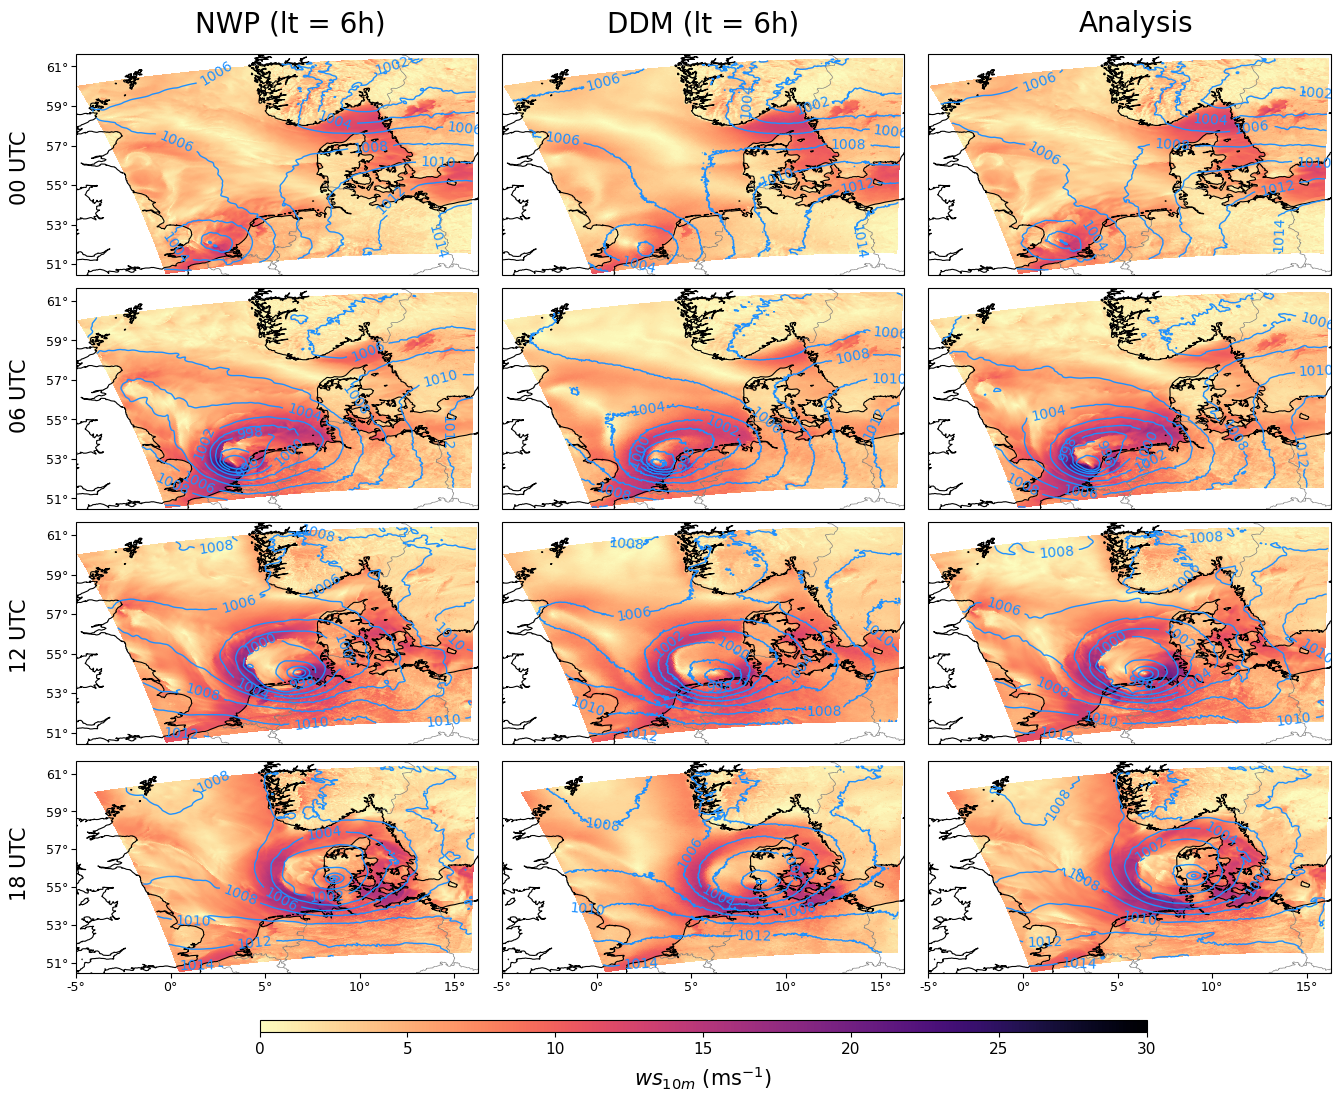

In [8]:
def plot_wind_and_pressure_vertical_columns(
        longitudes, latitudes, ws_cols, mslp_cols,
        col_titles, col_title_x_positions,
        row_labels, row_label_y_positions,
        row_label_x=0.02, row_label_rotation=45,
        col_title_y=0.96,
        color_isobar='dodgerblue',
        cbar_label=r"$\sqrt{u^2 + v^2}$ (ms$^{-1}$)",
        cmap_selected="magma_r",
        set_ticks_cbar=np.arange(0, 31, 5),
        vmin=0, vmax=30,
        panel_width=4.2, panel_height=3.1,
        hspace=0.04, wspace=0.06,
        save_path=None
    ):
    
    n_rows = len(ws_cols[0])
    n_cols = len(ws_cols)
    
    if len(col_title_x_positions) != n_cols:
        raise ValueError(f"Need {n_cols} x-positions, got {len(col_title_x_positions)}")
    if len(row_label_y_positions) != n_rows:
        raise ValueError(f"Need {n_rows} y-positions, got {len(row_label_y_positions)}")
    
    # Adjust left margin to accommodate tick labels
    fig = plt.figure(figsize=(n_cols * panel_width, n_rows * panel_height))
    gs = fig.add_gridspec(n_rows, n_cols,
                          hspace=hspace, wspace=wspace,
                          left=0.10, right=0.92, top=0.90, bottom=0.12)  # Increased left margin
    
    norm = plt.Normalize(vmin, vmax)
    pcm = None
    
    # --- Plot each panel ---
    for i in range(n_rows):
        for j in range(n_cols):
            ax = fig.add_subplot(gs[i, j], projection=ccrs.PlateCarree())
            ws = ws_cols[j][i]
            mslp = mslp_cols[j][i]
            
            pcm = ax.pcolormesh(longitudes, latitudes, ws,
                                cmap=cmap_selected, shading='auto', norm=norm)
            
            cs = ax.contour(longitudes, latitudes, mslp/100,
                            levels=range(994, 1016, 2),
                            colors=color_isobar, linewidths=1)
            ax.clabel(cs, fmt='%d', fontsize=10, inline=True)
            
            ax.coastlines(resolution='10m', linewidth=0.8)
            ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
            ax.set_extent([-4.1, 16.25, 50.45, 61.65], crs=ccrs.PlateCarree())
            ax.set_title("")  # no individual titles
            
            # Add latitude ticks to leftmost panels (j=0)
            if j == 0:
                lat_vals = [51, 53, 55, 57, 59, 61]
                ax.set_yticks(lat_vals, crs=ccrs.PlateCarree())
                ax.set_yticklabels([f"{lat}°" for lat in lat_vals])
                ax.tick_params(axis='y', which='both', left=True, labelleft=True, 
                              pad=2, labelsize=9)  # Reduced padding and font size
            else:
                ax.tick_params(axis='y', which='both', left=False, labelleft=False)

            # Add longitude ticks to bottom panels (i = n_rows-1)
            if i == n_rows - 1:
                lon_vals = [-5, 0, 5, 10, 15]
                ax.set_xticks(lon_vals, crs=ccrs.PlateCarree())
                ax.set_xticklabels([f"{lon}°" for lon in lon_vals])
                ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True,
                              pad=2, labelsize=9)  # Reduced padding and font size
            else:
                ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    # --- Column titles (manual x) ---
    for x, title in zip(col_title_x_positions, col_titles):
        fig.text(x, col_title_y, title,
                 ha='center', va='center', fontsize=20,
                 transform=fig.transFigure)
    
    # --- Row labels (manual y) ---
    for y, label in zip(row_label_y_positions, row_labels):
        fig.text(row_label_x, y, label,
                 ha='right', va='center', fontsize=15, rotation=row_label_rotation,
                 transform=fig.transFigure)
    
    # --- Colorbar (wide, centered, low) ---
    cbar_ax = fig.add_axes([0.22, 0.08, 0.58, 0.01])
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
    cbar.set_label(cbar_label, fontsize=15, labelpad=6)
    cbar.set_ticks(set_ticks_cbar)
    cbar.ax.tick_params(labelsize=11)
    
    # --- Save and show ---
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved at: {save_path}")
    
    plt.show()

# Call the function with your parameters
plot_wind_and_pressure_vertical_columns(
    longitudes=longitude_NWP,
    latitudes=latitude_NWP,
    ws_cols=[
        [ws_00_NWP_pred, ws_06_NWP_pred, ws_12_NWP_pred, ws_18_NWP_pred],
        [ws_00_DDM_pred,  ws_06_DDM_pred,  ws_12_DDM_pred,  ws_18_DDM_pred],
        [ws_00_NWP_gt,    ws_06_NWP_gt,    ws_12_NWP_gt,    ws_18_NWP_gt]
    ],
    mslp_cols=[
        [mslp_00_NWP_pred, mslp_06_NWP_pred, mslp_12_NWP_pred, mslp_18_NWP_pred],
        [mslp_00_DDM_pred,  mslp_06_DDM_pred,  mslp_12_DDM_pred,  mslp_18_DDM_pred],
        [mslp_00_NWP_gt,    mslp_06_NWP_gt,    mslp_12_NWP_gt,    mslp_18_NWP_gt]
    ],
    col_titles=["NWP (lt = 6h)", "DDM (lt = 6h)", "Analysis"],
    col_title_x_positions=[0.24, 0.51, 0.793],
    row_labels=["00 UTC", "06 UTC", "12 UTC", "18 UTC"],
    row_label_y_positions=[0.8, 0.61, 0.41, 0.22],
    row_label_x=0.07,
    row_label_rotation=90,
    col_title_y=0.92,
    cbar_label=r"$ws_{10m}$ (ms$^{-1}$)",
    vmin=0, vmax=30,
    hspace=0.005,      
    wspace=0.06,
    panel_width=5.1,    
    panel_height=3,
    save_path=""
)